## **케라스의 SimpleRNN과 LSTM 이해하기**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


위 입력은 단어 벡터의 차원은 5이고, 문장의 길이가 4인 경우를 가정한 입력입니다. 다시 말해 4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용됩니다. 그런데 앞서 RNN은 2D 텐서가 아니라 3D 텐서를 입력을 받는다고 언급한 바 있습니다. 즉, 위에서 만든 2D 텐서를 3D 텐서로 변경합니다. 이는 배치 크기 1을 추가해주므로서 해결합니다

In [3]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


## **SimpleRNN 이해하기**

In [4]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.9025377  -0.92894703  0.7715129 ]], shape: (1, 3)


In [5]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[ 0.96625733 -0.5482351   0.9510557 ]
  [ 0.9806567  -0.96872073  0.99768746]
  [ 0.7592949  -0.9870786   0.99835205]
  [ 0.07553639  0.3964831   0.8501291 ]]], shape: (1, 4, 3)


In [6]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[-0.23984686 -0.94296145  0.6600988 ]
  [-0.86909837 -0.8802616   0.9237433 ]
  [-0.97911334 -0.89417326  0.12042313]
  [-0.75167066 -0.90571964 -0.10544831]]], shape: (1, 4, 3)
last hidden state : [[-0.75167066 -0.90571964 -0.10544831]], shape: (1, 3)


In [7]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.98202974 -0.6835358  -0.92208266]], shape: (1, 3)
last hidden state : [[-0.98202974 -0.6835358  -0.92208266]], shape: (1, 3)


## **LSTM 이해하기**

In [8]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[ 0.66442215 -0.11926865  0.11583717]], shape: (1, 3)
last hidden state : [[ 0.66442215 -0.11926865  0.11583717]], shape: (1, 3)
last cell state : [[ 1.3568529 -0.3055322  1.0455666]], shape: (1, 3)


이번에는 SimpleRNN 때와는 달리, 세 개의 결과를 반환합니다. return_sequences가 False이므로 우선 첫번째 결과는 마지막 시점의 은닉 상태입니다. 그런데 LSTM이 SimpleRNN과 다른 점은 return_state를 True로 둔 경우에는 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환한다는 점입니다. 이번에는 return_sequences를 True로 바꿔보겠습니다.

In [9]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.01209035  0.04459111 -0.03371141]
  [-0.01701913  0.04055975 -0.16850047]
  [-0.15667897  0.08452754 -0.17844214]
  [-0.15589964  0.14666413 -0.35921577]]], shape: (1, 4, 3)
last hidden state : [[-0.15589964  0.14666413 -0.35921577]], shape: (1, 3)
last cell state : [[-0.27393946  0.23624554 -1.5385375 ]], shape: (1, 3)


return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없지만 return_sequences가 True이므로 첫번째 출력값은 모든 시점의 은닉 상태가 출력됩니다.

## **Bidirectional(LSTM) 이해하기**

난이도를 조금 올려서 양방향 LSTM의 출력값을 확인해보겠습니다. return_sequences가 True인 경우와 False인 경우에 대해서 은닉 상태의 값이 어떻게 바뀌는지 직접 비교하기 위해서 이번에는 출력되는 은닉 상태의 값을 고정시켜주겠습니다.

In [10]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [11]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


---

# **LSTM으로 주가분석**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [39]:
df = pd.read_csv('../dataset/data-02-stock_daily.csv')
x = np.loadtxt('../dataset/data-02-stock_daily.csv', delimiter=",", skiprows=2)
x = x[::-1]
x

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [40]:
df

,# http://finance.yahoo.com/quote/GOOG/history?ltr=1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Open,High,Low,Volume,Close
1,828.659973,833.450012,828.349976,1247700,831.659973
2,823.02002,828.070007,821.655029,1597800,828.070007
3,819.929993,824.400024,818.97998,1281700,824.159973
4,819.359985,823,818.469971,1304000,818.97998
...,...,...,...,...,...
728,599.992707,604.832763,562.192568,147100,567.002574
729,558.712504,568.452595,558.712504,7900,567.162558
730,566.892592,567.002574,556.932537,10800,556.972503
731,561.202549,566.43259,558.672539,41200,559.992565


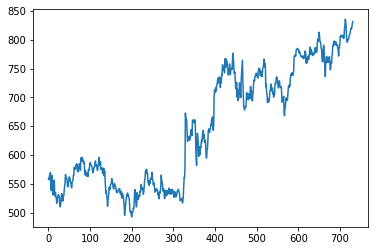

In [41]:
plt.plot(x[:, 4])
plt.show()

In [42]:
seqLength = 7
dataDim = 5
hiddenDim = 10          # dense값
outputDim = 1
lr = 0.01               # learning_rate값
iterations = 500        # epoch

train_size = int(len(x)*0.7)
trainset = x[0:train_size]
testset = x[train_size-7:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(trainset)
trainset = scaler.transform(trainset)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(testset)
testset = scaler.transform(testset)


In [43]:
trainset

array([[2.53065031e-01, 2.45070970e-01, 2.33983036e-01, 4.66075110e-04,
        2.32039560e-01],
       [2.29604366e-01, 2.39728936e-01, 2.54567513e-01, 2.98467330e-03,
        2.37426028e-01],
       [2.49235510e-01, 2.41668371e-01, 2.48338489e-01, 2.59926504e-04,
        2.26793794e-01],
       ...,
       [8.39570954e-01, 8.39838973e-01, 8.87125814e-01, 1.00779780e-01,
        8.63403284e-01],
       [8.31877329e-01, 8.51543969e-01, 8.87806005e-01, 9.37348750e-02,
        8.91180355e-01],
       [8.64998078e-01, 8.54129989e-01, 8.90383640e-01, 1.29541992e-01,
        8.72134355e-01]])

In [44]:
testset

array([[0.47419206, 0.50445037, 0.51770809, 0.22296353, 0.49142842],
       [0.46909658, 0.46301195, 0.47045433, 0.2111109 , 0.45809697],
       [0.40525134, 0.46000606, 0.44658508, 0.18462886, 0.48772461],
       ...,
       [0.89281215, 0.89655181, 0.94323484, 0.12965206, 0.93124657],
       [0.91133638, 0.91818448, 0.95944078, 0.1885611 , 0.95460261],
       [0.94514702, 0.94989685, 1.        , 0.12331575, 0.97604677]])

In [46]:
def buildDataSet(timeSeries, seqLength):
    xdata=[]
    ydata=[]
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength, :-1]
        ty = timeSeries[i+seqLength, [-1]]
        xdata.append(tx)
        ydata.append(ty)

    return np.array(xdata), np.array(ydata)

trainX, trainY = buildDataSet(trainset, seqLength)
testX, testY = buildDataSet(testset, seqLength)


## **simpleRNN 예측 및 평가**

In [47]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=10, activation='tanh', input_shape=[7,4]))
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [49]:
hist=model.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.9936 - mse: 0.9936
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1749 - mse: 0.1749
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0605 - mse: 0.0605
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0122 - mse: 0.0122
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0090
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 11/1000
32/32 [============================

In [50]:
#모델 테스트
res = model.evaluate(testX, testY, batch_size=16)
print(f'loss:{res[0]}, mae:{res[1]}')

14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023
loss:0.002333564916625619, mae:0.002333564916625619


In [51]:
yhat = model.predict(testX)
print(yhat)

print(f' mse evaluate : [np.average{yhat-testY}**2]')

[[ 0.42615238]
 [ 0.40675738]
 [ 0.42279917]
 [ 0.4084131 ]
 [ 0.51669174]
 [ 0.52877206]
 [ 0.5489046 ]
 [ 0.5621666 ]
 [ 0.5232652 ]
 [ 0.50837946]
 [ 0.56244165]
 [ 0.2909416 ]
 [ 0.2919979 ]
 [ 0.28186616]
 [ 0.13603438]
 [ 0.22827677]
 [ 0.23450005]
 [ 0.18861464]
 [ 0.15608251]
 [ 0.14055407]
 [ 0.1504632 ]
 [ 0.21030857]
 [ 0.2960099 ]
 [ 0.32134932]
 [ 0.28366596]
 [ 0.26416564]
 [ 0.27873188]
 [ 0.26498666]
 [ 0.26235694]
 [ 0.20382245]
 [ 0.18705685]
 [ 0.26767367]
 [ 0.2314222 ]
 [ 0.2794814 ]
 [ 0.3194555 ]
 [ 0.3280679 ]
 [ 0.38212645]
 [ 0.42933315]
 [ 0.36753884]
 [ 0.34493366]
 [ 0.32236883]
 [ 0.292395  ]
 [ 0.28760782]
 [ 0.34740412]
 [ 0.33716372]
 [ 0.3027205 ]
 [ 0.3092041 ]
 [ 0.2828971 ]
 [ 0.3033709 ]
 [ 0.22877976]
 [ 0.14509402]
 [ 0.18210463]
 [ 0.19572024]
 [ 0.13813381]
 [ 0.13247854]
 [ 0.05963182]
 [-0.0049754 ]
 [ 0.10864603]
 [ 0.09861017]
 [ 0.0643703 ]
 [ 0.15043071]
 [ 0.1629476 ]
 [ 0.1886889 ]
 [ 0.14122665]
 [ 0.23042375]
 [ 0.28412288]
 [ 0.32317

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=10, activation='tanh', input_shape=[7,4]))
model.add(Dense(1))

model.summary()